# 인공지능 과제 #1 / 18010091 경영학과 정강민

In [1]:
# MNIST 데이터셋은 숫자들이 넘파이 형식으로 구성되어 있음
import numpy as np

# 이미지 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 분석을 위한 tensorflow
import tensorflow as tf

In [2]:
# Sequential 클래스 각 레이어를 순서대로 쌓아서 모델을 만들 때 이용함
from tensorflow.keras.models import Sequential

# Flatten: 이미지나 다차원 데이터를 1차원으로 펼치는데 사용됨
# Dense: Fully connected layer를 정의하는 데 사용됨
from tensorflow.keras.layers import Flatten, Dense

# 1) 데이터를 탐색하여 데이터의 구조와 샘플 개수, 레이블 등을 파악하고 주석으로 설명하시오.

- MNIST 데이터셋은 이미지와 레이블로 구성됨
- MNIST 데이터셋은 28X28 픽셀 크기의 흑백 이미지로 구성되어 있으며, 각 이미지는 28X28 픽셀의 2D 배열로 표현됨
- MNIST 데이터셋은 총 7만개의 이미지로 구성되어 있으며, 6만개는 모델을 학습시키는 train 데이터이고, 1만개는 모델의 성능을 평가하는 test 데이터임
- MNIST 데이터셋의 레이블은 0부터 9까지의 정수로 구성되어 있음

In [3]:
# MNIST 데이터셋을 로드합니다.
mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 데이터 구조 살펴보기

# train 데이터는 모델을 학습시킬때 사용
print('x_train 데이터 shape : ', x_train.shape)
print('y_train 데이터 shape : ', y_train.shape)

# test 데이터는 모델의 성능을 테스트할 때 사용
print('x_test 데이터 shape : ', x_test.shape)
print('y_test 데이터 shape : ', y_test.shape)

x_train 데이터 shape :  (60000, 28, 28)
y_train 데이터 shape :  (60000,)
x_test 데이터 shape :  (10000, 28, 28)
y_test 데이터 shape :  (10000,)


In [5]:
# 레이블 살펴보기
unique_labels = list(set(y_train))
print('레이블 구성 : ', unique_labels)

레이블 구성 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# 2) 10번째 샘플 이미지를 출력하시오.

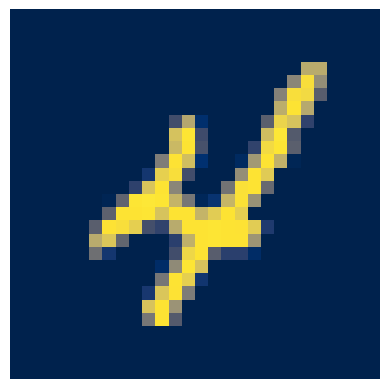

10번째 숫자는 4 입니다.


In [6]:
plt.imshow(x_train[9], cmap='cividis')

# 축 숨겨주기
plt.axis('off')

# 이미지와 레이블 출력하기
# 10번째 샘플 이미지는 4임
plt.show()
print('10번째 숫자는', y_train[9], '입니다.')

# 3) 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력하시오.

In [7]:
# matplotlib 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

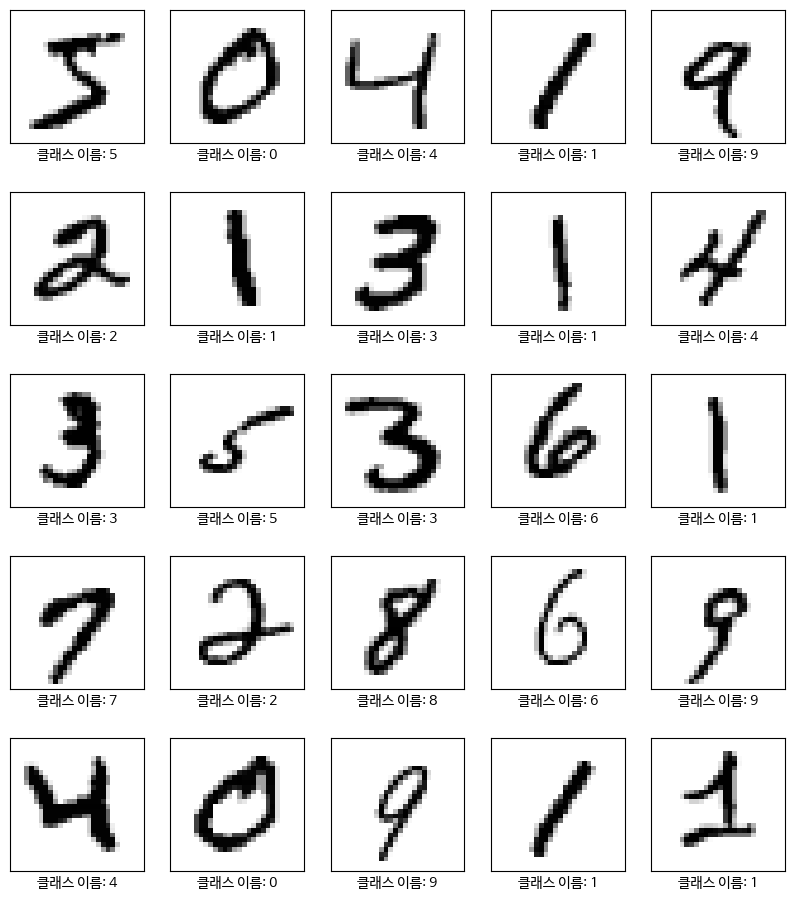

In [8]:
# x_train 세트에서 처음 25개 이미지와 클래스 이름(각 이미지의 레이블)을 출력함
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0)  # 하단 여백 조정
plt.rc('font', family='NanumBarunGothic')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])  # x축 눈금 제거
    plt.yticks([])  # y축 눈금 제거
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # 이미지 출력
    plt.xlabel(f"클래스 이름: {y_train[i]}") # 클래스 이름 출력

plt.show()

## - 데이터 전처리

In [9]:
# 모델은 단순한 정수를 처리하는것보다 0~1 사이의 실수를 처리할 때 더 좋은 성능을 보임. 따라서 이미지 데이터를 [0, 1] 범위로 정규화함
# 이미지는 0(흰색)~255(검은색)의 픽셀값으로 이루어져 있기 때문에 이미지에 255를 나눠줘 전처리를 진행함
x_train, x_test = x_train / 255.0, x_test / 255.0

# 4) 예시 코드를 따라 모델을 구성하고, 각 과정에 대해 주석으로 설명하시오.

문제의 요구사항에 따라 dropout layer은 제외한다.
- Dropout layer : 학습 과정에서 일부 뉴런의 연결을 임의로 비활성화 시켜 오버피팅을 방지함

In [10]:
# 모델을 선언한다
model = tf.keras.models.Sequential([
  # Flatten은 입력 데이터를 1차원으로 평탄화하며 입력 데이터를 변경하지 않고 1D 벡터로 변경해주는 클래스
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Dense는 Fully connected layer를 구현한 클래스 / Relu 활성화 함수를 사용했으며, 128개의 출력 뉴런을 사용함
  # Relu 활성화 함수는 기본적으로 은닉층에서 사용됨
  tf.keras.layers.Dense(128, activation='relu'),

  # 다중 분류 모델의 경우 사용되는 마지막 활성화 함수. 10개의 출력 뉴런을 사용함
  # 우리의 목표는 0~9까지의 정수 10개로 최종적으로 분류하는 것
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델을 compile하는 함수이며 모델 학습 전 주요 인자들을 설정해준다
model.compile(optimizer='adam', # adam은 학습률을 자동으로 조정해주는 알고리즘임
              # sparse_categorical_crossentrophy는 정수 형태의 클래스 레이블을 처리하는데 사용됨
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #모델의 성능을 평가하는 지표로 정확도를 사용함

# 모델에 대한 간단한 요약을 해주는 함수
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# 모델의 첫번째 은닉층에서 로짓을 반환함
predictions = model(x_train[:1]).numpy()
predictions

array([[0.07701226, 0.11168482, 0.08361258, 0.11814933, 0.10844354,
        0.12784953, 0.09082925, 0.09264629, 0.12991764, 0.05985482]],
      dtype=float32)

In [12]:
# 소프트맥스 함수는 로짓을 입력값으로 사용하여 각 클래스에 대한 확률로 변환함
# 출력 중 가장 높은 확률을 보이는 클래스가 해당 입력 데이터의 예측 레이블에 해당함
tf.nn.softmax(predictions).numpy()

array([[0.09770426, 0.10115133, 0.09835128, 0.10180734, 0.10082401,
        0.10279971, 0.09906362, 0.09924378, 0.10301252, 0.09604221]],
      dtype=float32)

In [13]:
# True 인덱스를 설정해줌으로써 모델의 출력을 확률 분포로 변환하지 않고 직접 로짓 값과 실제 레이블 간의 손실을 계산해줌
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
# 훈련되지 않은 모델은 무작위에 가까운 확률을 제공하므로 초기 loss 값이 2.3에 근사해야만 함
loss_fn(y_train[:1], predictions).numpy()

2.2749727

In [15]:
# 새롭게 설정한 모델을 컴파일해주고 향후 분석을 해당 모델로 진행함
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# 5) epochs를 10으로 설정하여 모델을 훈련하고, 성능에 대해 주석으로 평가하시오

In [16]:
# epoch를 10으로 설정하고, 훈련 데이터의 20%를 검증용 데이터로 분할함
hist = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# 학습 완료 후 검증 단계. verbose=2는 모델 평가 완료 후 최종 평가 결과만 출력할 것을 의미함
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("손실률:", loss)
print("정확도:", acc)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 8s 5ms/step - loss: 0.2828 - accuracy: 0.9190 - val_loss: 0.1501 - val_accuracy: 0.9579
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1229 - accuracy: 0.9632 - val_loss: 0.1145 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0841 - accuracy: 0.9742 - val_loss: 0.1037 - val_accuracy: 0.9689
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0631 - accuracy: 0.9814 - val_loss: 0.0954 - val_accuracy: 0.9707
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0903 - val_accuracy: 0.9740
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0878 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0844 - val_accuracy: 0.9758
Epo

모델의 loss가 낮고 accuracy가 높을수록 모델의 성능이 높다.

epoch가 거듭될수록 loss 값이 감소하고 있으며 accuracy 값은 상승하고 있다.

모델의 최종 평가 결과는 마지막 에포크에서의 결과를 확인하면 되는데, loss가 0.09395940601825714이고, accuracy가 0.974399983882904로 도출되었다. 즉, 손실률이 9.4%, 정확도가 97.4%임을 의미하며 본 모델의 성능을 나타낸다.

아래의 차트는 에포크별 accuracy와 loss의 추이를 시각화한 것이다.


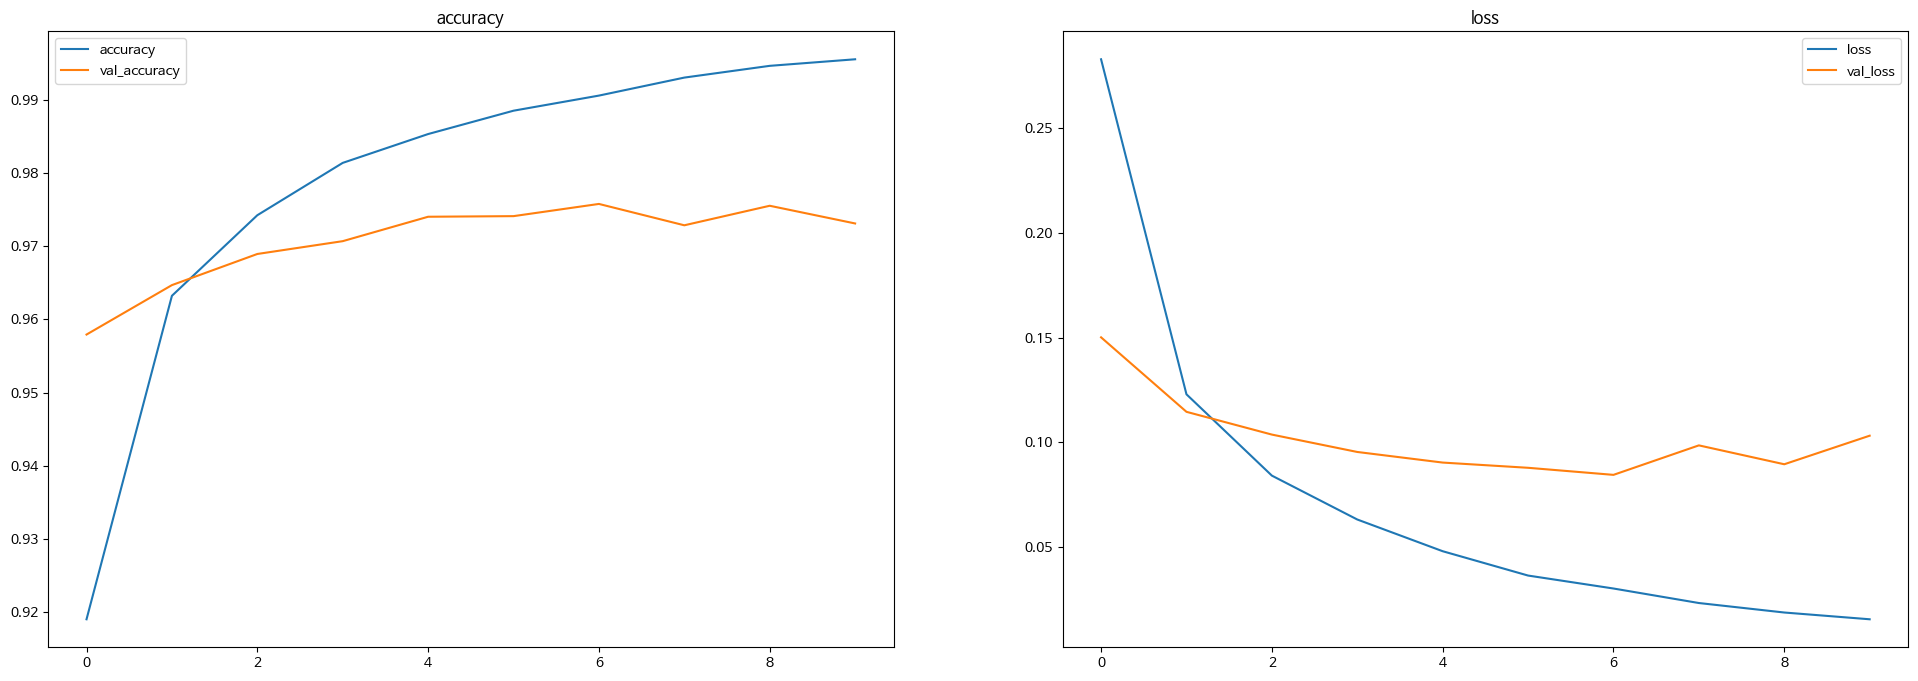

In [17]:
plt.figure(figsize=(24, 8))

# 에포크별 정확도(accuracy)
plt.subplot(1,2,1) # 1행 2열로 차트를 출력하겠다
plt.plot(hist.history["accuracy"], label="accuracy") # train_data 정확도 차트
plt.plot(hist.history["val_accuracy"], label="val_accuracy") #val_data 정확도 차트
plt.title("accuracy")
plt.legend()

# 에포크별 손실률(loss)
plt.subplot(1,2,2)
plt.plot(hist.history["loss"], label="loss") # train_data 손실률 차트
plt.plot(hist.history["val_loss"], label="val_loss") # val_data 손실률 차트
plt.title("loss")
plt.legend()

plt.show()